In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import os

# Plotting libraries
import matplotlib.pyplot as plt

# SKLearn libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Read the data

In [2]:
# Dataframe from csv file
iris_data  = pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')

Exploritariy data analysis

In [3]:
# Display information about the dataset
iris_data.info()
print("=="*40)
iris_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


Separate the features and target variables

In [4]:
# Separate the features and target variables
X = iris_data.loc[:, iris_data.columns != 'species']
y = iris_data.loc[:, ['species']]

Encoding the categorical data

In [5]:
# Encode the target variable
y_enc = LabelEncoder().fit_transform(y)
# Converting the label into a matrix form
y_label = tf.keras.utils.to_categorical(y_enc)

# Check data after encoding it
y_label[:5]

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

# Split the data into training and testing sets

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.3)

In [7]:
# Display the shapes of the training data
print(f"Train shape : {X_train.shape}, Y Train : {y_train.shape}")
print(X_train.shape[1:])

Train shape : (105, 4), Y Train : (105, 3)
(4,)



# Define the model architecture

In [8]:

# Define the model architecture
def get_model():
    model = Sequential([
        keras.layers.Input(shape=X_train.shape[1:]),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(500, activation='relu'),
        keras.layers.Dense(300, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(3, activation='softmax')
    ])

    return model

# run the model 
model = get_model()

# Compile the model

In [9]:
# Compile the model
model.compile(optimizer='adam',
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Training the model

In [10]:
# Train the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=1)

Epoch 1/30
4/4 [==============================] - 2s 109ms/step - loss: 0.9636 - accuracy: 0.4667 - val_loss: 0.7222 - val_accuracy: 0.9556
Epoch 2/30
4/4 [==============================] - 0s 20ms/step - loss: 0.6048 - accuracy: 0.7429 - val_loss: 0.5364 - val_accuracy: 0.6000
Epoch 3/30
4/4 [==============================] - 0s 27ms/step - loss: 0.4362 - accuracy: 0.7524 - val_loss: 0.3791 - val_accuracy: 0.8444
Epoch 4/30
4/4 [==============================] - 0s 20ms/step - loss: 0.4262 - accuracy: 0.7810 - val_loss: 0.4800 - val_accuracy: 0.6667
Epoch 5/30
4/4 [==============================] - 0s 23ms/step - loss: 0.3459 - accuracy: 0.8571 - val_loss: 0.2584 - val_accuracy: 0.9778
Epoch 6/30
4/4 [==============================] - 0s 20ms/step - loss: 0.2528 - accuracy: 0.8952 - val_loss: 0.2143 - val_accuracy: 0.9778
Epoch 7/30
4/4 [==============================] - 0s 20ms/step - loss: 0.1987 - accuracy: 0.9619 - val_loss: 0.1924 - val_accuracy: 0.9333
Epoch 8/30
4/4 [==========

# Evalutaion of the model

In [11]:
# Evaluate the model on the test data
print(model.evaluate(X_test, y_test))

2/2 [==============================] - 0s 6ms/step - loss: 0.1004 - accuracy: 0.9556
[0.10040157288312912, 0.9555555582046509]


# Plotting the accuracy

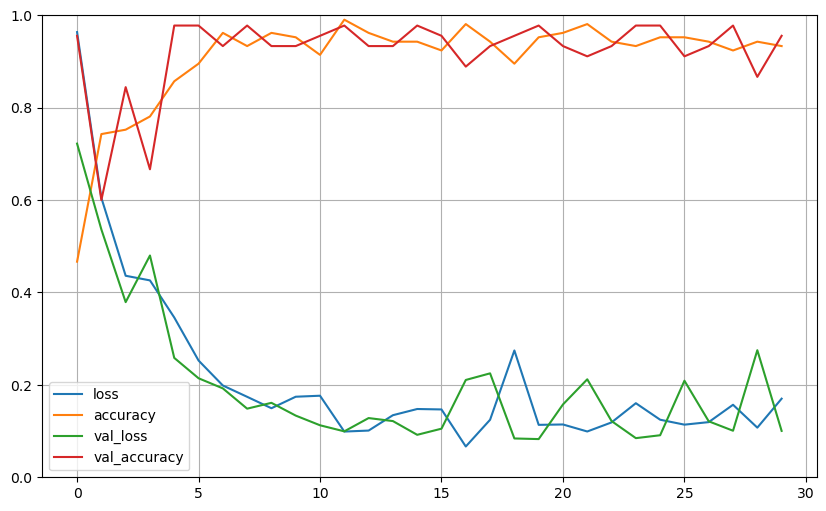

In [12]:
# Plot the training and validation accuracy over epochs
pd.DataFrame(history.history).plot(figsize=(10, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()